In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [3]:
df = pd.read_csv('Desktop\sas.csv')
df

,Q1,Q2,Q3.面,Q3.饭,Q3.火锅,Q3.粥,Q3.均未购买,Q4.超市,Q4.批发,Q4.京东,...,Q15.外观包装,Q16,Q17,Q18,Q19.公务员/事业单位员工,Q19.教师,Q19.其它,Q19.企业职员,Q19.学生,Q19.自由职业者
0,1,1,0,0,1,0,0,1,0,0,...,0,2,0,2,0,0,0,0,0,1
1,1,1,1,1,1,1,0,1,1,1,...,0,3,1,3,0,0,0,1,0,0
2,1,1,0,1,1,0,0,1,0,1,...,0,2,1,2,1,0,0,0,0,0
3,3,1,1,1,1,1,0,1,1,1,...,0,2,1,1,0,0,0,1,0,0
4,2,1,0,0,1,0,0,1,0,0,...,1,4,1,5,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1,1,1,1,0,0,0,1,1,1,...,0,1,0,4,0,0,0,0,1,0
1009,1,1,0,1,0,0,0,0,0,1,...,0,3,0,3,0,0,0,1,0,0
1010,1,1,0,0,1,1,0,1,0,1,...,0,2,0,4,0,0,0,1,0,0
1011,1,1,1,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0


In [4]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [5]:
d1=df.dropna(subset=["Q5"])
d1

,Q1,Q2,Q3.面,Q3.饭,Q3.火锅,Q3.粥,Q3.均未购买,Q4.超市,Q4.批发,Q4.京东,...,Q15.外观包装,Q16,Q17,Q18,Q19.公务员/事业单位员工,Q19.教师,Q19.其它,Q19.企业职员,Q19.学生,Q19.自由职业者
0,1,1,0,0,1,0,0,1,0,0,...,0,2,0,2,0,0,0,0,0,1
1,1,1,1,1,1,1,0,1,1,1,...,0,3,1,3,0,0,0,1,0,0
2,1,1,0,1,1,0,0,1,0,1,...,0,2,1,2,1,0,0,0,0,0
3,3,1,1,1,1,1,0,1,1,1,...,0,2,1,1,0,0,0,1,0,0
4,2,1,0,0,1,0,0,1,0,0,...,1,4,1,5,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1,1,1,1,0,0,0,1,1,1,...,0,1,0,4,0,0,0,0,1,0
1009,1,1,0,1,0,0,0,0,0,1,...,0,3,0,3,0,0,0,1,0,0
1010,1,1,0,0,1,1,0,1,0,1,...,0,2,0,4,0,0,0,1,0,0
1011,1,1,1,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0


In [6]:
d1.columns


Index(['Q1', 'Q2', 'Q3.面', 'Q3.饭', 'Q3.火锅', 'Q3.粥', 'Q3.均未购买', 'Q4.超市',
       'Q4.批发', 'Q4.京东', 'Q4.直播间', 'Q5', 'Q6.A 不看牌子，喜欢哪个就买哪个', 'Q6.B 只喜欢一个牌子',
       'Q6.C 习惯买一个牌子，但说不上喜欢', 'Q6.D 多个牌子换着买', 'Q8.方便携带', 'Q8.食材健康', 'Q8.价格便宜',
       'Q8.种类多样', 'Q8.味道好', 'Q8.操作简单', 'Q8.其他', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4',
       'Q9.5', 'Q9.6', 'Q9.7', 'Q9.8', 'Q10.否', 'Q10.是', 'Q13', 'Q14.朋友介绍',
       'Q14.电视', 'Q14.QQ', 'Q14.购物时无意', 'Q14.直播带货', 'Q14.其他', 'Q15.知名度',
       'Q15.他人评价', 'Q15.口味风格', 'Q15.广告', 'Q15.优惠程度', 'Q15.外观包装', 'Q16', 'Q17',
       'Q18', 'Q19.公务员/事业单位员工', 'Q19.教师', 'Q19.其它', 'Q19.企业职员', 'Q19.学生',
       'Q19.自由职业者'],
      dtype='object')

In [7]:
d1['Q100']=d1['Q6.A 不看牌子，喜欢哪个就买哪个']+2*d1[ 'Q6.B 只喜欢一个牌子']+3*d1['Q6.C 习惯买一个牌子，但说不上喜欢']+4*d1['Q6.D 多个牌子换着买']

<ipython-input-7-4fb4a3ad0884>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Q100']=d1['Q6.A 不看牌子，喜欢哪个就买哪个']+2*d1[ 'Q6.B 只喜欢一个牌子']+3*d1['Q6.C 习惯买一个牌子，但说不上喜欢']+4*d1['Q6.D 多个牌子换着买']


In [8]:
d1['Q100']

0       3
1       3
2       3
3       4
4       4
       ..
1008    2
1009    3
1010    3
1011    4
1012    1
Name: Q100, Length: 1008, dtype: int64

In [9]:
X=np.array(d1[[ 'Q1','Q9.1',
       'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q9.6', 'Q9.7', 'Q9.8','Q13', 'Q16', 'Q17', 'Q18','Q19.公务员/事业单位员工', 'Q19.教师', 'Q19.其它', 'Q19.企业职员',
       'Q19.学生', 'Q19.自由职业者','Q100' ]])

In [10]:
y=np.array(d1[['Q5']])

In [11]:
y[y>1]=2

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

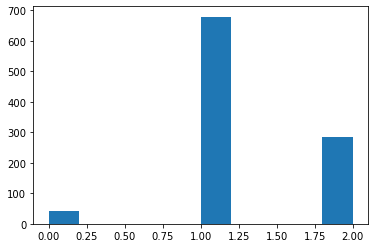

In [13]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(y)
plt.show()

In [14]:
from collections import Counter

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/2,random_state = 1024)

In [16]:
from imblearn.over_sampling import SVMSMOTE
X_resampled, y_resampled = SVMSMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 178), (1.0, 337), (2.0, 337)]


In [17]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.model_selection import GridSearchCV   

In [20]:
R_tree=RandomForestClassifier(n_estimators=5,criterion='gini',bootstrap=True,n_jobs=2,random_state=8)

In [21]:
dicts = {
    "n_estimators":[25,50,75,100,150,200,250,300,500,1000,2000],
    "max_depth":[1,2,5,7,10]
}
R_tree = GridSearchCV(R_tree,param_grid=dicts,cv=10)

In [22]:
R_tree.fit(X_resampled, y_resampled)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=5, n_jobs=2,
                                              random_state=8),
             param_grid={'max_depth': [1, 2, 5, 7, 10],
                         'n_estimators': [25, 50, 75, 100, 150, 200, 250, 300,
                                          500, 1000, 2000]})

In [45]:
y_ = R_tree.predict(X_test)


In [47]:
y_

array([0., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
       2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2.,
       2., 1., 1., 2., 1., 1., 0., 1., 2., 1., 2., 2., 1., 1., 1., 2., 2.,
       1., 0., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1.,
       2., 2., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       2., 1., 1., 1., 1., 2., 1., 1., 0., 1., 1., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 0., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2.,
       1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 0., 1., 2., 1.,
       1., 1., 2., 1., 1.

In [48]:
print(R_tree.best_params_) #最佳参数
print(R_tree.best_score_)  #最佳结果


{'max_depth': 10, 'n_estimators': 75}
0.837505972288581


In [18]:
rf=RandomForestClassifier(n_estimators=75,max_depth=10,criterion='gini',bootstrap=True,n_jobs=2,random_state=8)

In [19]:
from sklearn.metrics import classification_report 

In [20]:
print(classification_report(y_true=y_test,y_pred=y_))

NameError: name 'y_' is not defined

In [34]:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=10, n_estimators=75, n_jobs=2, random_state=8)

In [35]:
w= rf.predict(X_test)


In [36]:
w

array([0., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 0., 1., 1., 2.,
       2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2.,
       2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2.,
       1., 0., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1.,
       1., 2., 2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 2., 2., 1., 2., 1., 1., 0., 1., 1., 2., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1.,
       1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2.,
       2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1.,
       1., 1., 2., 1., 1.

In [37]:
print(classification_report(y_true=y_test,y_pred=w))

              precision    recall  f1-score   support

         0.0       0.32      0.29      0.30        21
         1.0       0.77      0.73      0.75       342
         2.0       0.48      0.55      0.51       141

    accuracy                           0.66       504
   macro avg       0.52      0.52      0.52       504
weighted avg       0.67      0.66      0.66       504



In [38]:
rf.feature_importances_

array([0.03970528, 0.06935854, 0.0513018 , 0.06554309, 0.06186436,
       0.08930403, 0.05622928, 0.06719932, 0.06495426, 0.07326369,
       0.04246956, 0.1143941 , 0.00950577, 0.00937729, 0.00335578,
       0.03013042, 0.06613112, 0.01089966, 0.07501264])

In [68]:
m=d1[[ 'Q1','Q9.1',
       'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q9.6', 'Q9.7', 'Q9.8', 'Q13,''Q16', 'Q17', 'Q18','Q19.公务员/事业单位员工', 'Q19.教师', 'Q19.其它', 'Q19.企业职员',
       'Q19.学生', 'Q19.自由职业者' ]]
m

,Q1,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q9.6,Q9.7,Q9.8,Q16,Q17,Q18,Q19.公务员/事业单位员工,Q19.教师,Q19.其它,Q19.企业职员,Q19.学生,Q19.自由职业者
0,1,5,4,4,4,5,5,4,4,2,0,2,0,0,0,0,0,1
1,1,3,3,4,4,3,3,4,4,3,1,3,0,0,0,1,0,0
2,1,5,4,5,5,2,5,1,5,2,1,2,1,0,0,0,0,0
3,3,5,4,3,3,5,4,3,4,2,1,1,0,0,0,1,0,0
4,2,5,4,3,3,3,5,4,5,4,1,5,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1,5,4,5,5,4,4,5,5,1,0,4,0,0,0,0,1,0
1009,1,3,4,5,4,3,3,5,4,3,0,3,0,0,0,1,0,0
1010,1,4,5,4,3,4,4,4,3,2,0,4,0,0,0,1,0,0
1011,1,4,5,3,4,4,3,5,4,1,1,0,0,0,0,0,1,0


In [69]:
m.columns

Index(['Q1', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q9.6', 'Q9.7', 'Q9.8',
       'Q16', 'Q17', 'Q18', 'Q19.公务员/事业单位员工', 'Q19.教师', 'Q19.其它', 'Q19.企业职员',
       'Q19.学生', 'Q19.自由职业者'],
      dtype='object')

In [72]:
import pydotplus

In [81]:
i=0
for per_rf in rf.estimators_:
    dot_data = tree.export_graphviz(per_rf, out_file=None, 
                         feature_names=m.columns,  
                         class_names=['0','1','2'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    i = i+1
    graph.write_pdf(str(i)+"DTtree.pdf") 

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
graph.write_pdf(str(i)+"DTtree.pdf") 

True